# Code for Experiment 2 - Measuring Impedance

In [1]:
# dependencies
import matplotlib.pyplot as plt
import numpy as np

## Data Analysis

### Impedance and phase shift for an inductor

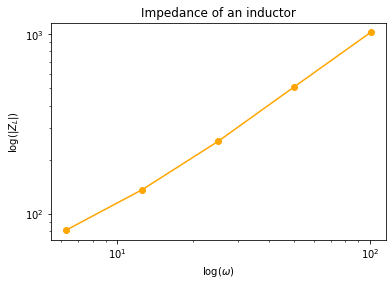

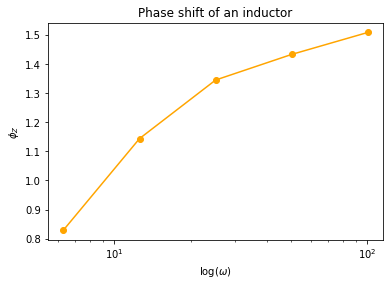

In [4]:
# complex unit
i = 1j

# Data - Inductor
f_values = [1, 2, 4, 8, 16]  # frequency in kHz
R = 10  # resistance in ohm
U_0_values = [3.5, 4.2, 4.7, 4.9, 5.0]  # voltage over inductor and resistor in V
V_0_values = [4e-1, 3e-1, 1.84e-1, 0.96e-1, 0.49e-1]  # voltage over resistor in V
T = [1, 0.5, 0.25, 0.125, 0.0625]  # period in ms
T = [element * 10 ** -3 for element in T]  # convert to s
peak_U_values = [252, 125, 62.5, 31.5, 15.6]  # peak position in µs
peak_V_values = [384, 216, 116, 60, 30.6]  # peak position in µs
peak_U_values = [element * 10 ** -6 for element in peak_U_values]  # convert to s
peak_V_values = [element * 10 ** -6 for element in peak_V_values]  # convert to s

# Calculate phase from peak measurements
phi_U_values = [-peak / T * 2 * np.pi for peak, T in zip(peak_U_values, T)]
phi_V_values = [-peak / T * 2 * np.pi for peak, T in zip(peak_V_values, T)]

# Calculate circular velocity
omega = [2 * np.pi * f for f in f_values]


# Function for calculating phase difference
def calculatePhaseDifferences(phi_U_values, phi_V_values):
    phi_Z_values = [phi_U - phi_V for phi_U, phi_V in zip(phi_U_values, phi_V_values)]
    return phi_Z_values


# Function for calculating impedance
def calculateImpedance(U_0, V_0, phi_Z):
    Z_hat = (U_0 / V_0 * np.exp(i * phi_Z) - 1) * R
    return Z_hat


# Calculate impedance of the inductor
phi_Z_values = calculatePhaseDifferences(phi_U_values, phi_V_values)
Z_hat = [calculateImpedance(U_0, V_0, phi_Z) for U_0, V_0, phi_Z in zip(U_0_values, V_0_values, phi_Z_values)]
Z_hat_real = [np.abs(z) for z in Z_hat]    # get modulus of Z_hat

# Plot
Z_plot = plt.figure(1)
plt.loglog(omega, Z_hat_real, '-o', color='orange')
plt.title('Impedance of an inductor')
plt.xlabel(r'$\log(\omega)$')
plt.ylabel(r'$\log\left(|Z_L|\right)$')

phi_Z_plot = plt.figure(2)
plt.semilogx(omega, phi_Z_values, '-o', color='orange')
plt.title('Phase shift of an inductor')
plt.xlabel(r'$\log(\omega)$')
plt.ylabel(r'$\phi_Z$')
plt.show()


### Impedance and phase shift of a capacitor

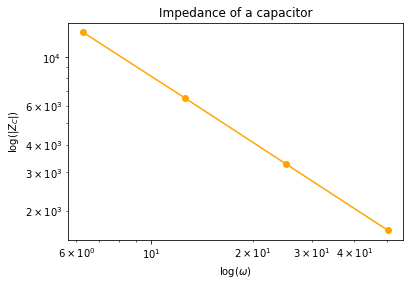

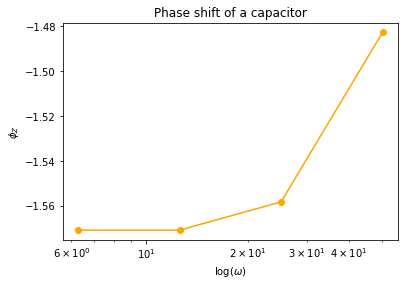

In [9]:
# complex unit
i = 1j

# Data - Capacitor
f_values = [1, 2, 4, 8] # frequency in kHz
R = 150           # resistance in ohm
U_0_values = [5.0, 5.0, 5.0, 5.0]                    # voltage over inductor and resistor in V
V_0_values = [0.58e-1, 1.15e-1, 2.30e-1, 4.57e-1] # voltage over resistor in V
T = [1, 0.5, 0.25, 0.125]       # period in ms
T = [element * 10**-3 for element in T] # convert to s
peak_U_values = [250, 125, 62, 31.5] # peak position in µs
peak_V_values = [0, 0, 0, 2]    # peak position in µs
peak_U_values = [element * 10**-6 for element in peak_U_values] # convert to s
peak_V_values = [element * 10**-6 for element in peak_V_values] # convert to s

# Calculate phase from peak measurements
phi_U_values = [-peak / T * 2 * np.pi for peak, T in zip(peak_U_values, T)]
phi_V_values = [-peak / T * 2 * np.pi for peak, T in zip(peak_V_values, T)]

# Calculate circular velocity
omega = [2 * np.pi * f for f in f_values]


# Function for calculating phase difference
def calculatePhaseDifferences(phi_U_values, phi_V_values):
    phi_Z_values = [phi_U - phi_V for phi_U, phi_V in zip(phi_U_values, phi_V_values)]
    return phi_Z_values


# Function for calculating impedance
def calculateImpedance(U_0, V_0, phi_Z):
    Z_hat = (U_0 / V_0 * np.exp(i * phi_Z) - 1) * R
    return Z_hat


# Calculate impedance of the inductor
phi_Z_values = calculatePhaseDifferences(phi_U_values, phi_V_values)
Z_hat = [calculateImpedance(U_0, V_0, phi_Z) for U_0, V_0, phi_Z in zip(U_0_values, V_0_values, phi_Z_values)]
Z_hat_real = [np.abs(z) for z in Z_hat]    # get modulus of Z_hat

# Plot
Z_plot = plt.figure(1)
plt.loglog(omega, Z_hat_real, '-o', color='orange')
plt.title('Impedance of a capacitor')
plt.xlabel(r'$\log(\omega)$')
plt.ylabel(r'$\log\left(|Z_C|\right)$')

phi_Z_plot = plt.figure(2)
plt.semilogx(omega, phi_Z_values, '-o', color='orange')
plt.title('Phase shift of a capacitor')
plt.xlabel(r'$\log(\omega)$')
plt.ylabel(r'$\phi_Z$')
plt.show()
